In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import seaborn as sns
from collections import Counter

## Concat tables

In [2]:
d1 = pd.read_csv('../data/SL132001-data (11).csv')
d2 = pd.read_csv('../data/SL132001-data (12).csv')

In [6]:
data = pd.concat([d1.iloc[1:], d2[1:]], axis=0, ignore_index=True)
data

,Date,Time GMT -4,Timestamp,Ozone - Low Conc.,Hydrogen Sulfide - Low Conc.,Total VOCs (ppm) - PID,Carbon Dioxide - Low Conc.,Particulate Matter 1,Particulate Matter 2.5,Particulate Matter 10,Temperature (Internal),Humidity (Internal),Temperature (External),Humidity (External),Latitude,Longitude,Unnamed: 16
0,26/05/2020,8:51:45,1590497505000,0.210,0.000,0.266,466.607,18.270,19.519,19.759,23.87,45.76,23.25,47.54,43.962193,-79.267792,NaN
1,26/05/2020,8:52:44,1590497564000,0.217,0.001,0.268,467.189,14.326,15.149,15.149,23.81,45.93,23.18,47.75,43.962193,-79.267792,NaN
2,26/05/2020,8:53:44,1590497624000,0.222,0.001,0.269,468.038,10.830,11.453,11.453,23.91,45.94,23.25,47.84,43.962193,-79.267792,NaN
3,26/05/2020,8:54:44,1590497684000,0.209,0.001,0.270,473.823,11.914,12.798,13.038,23.85,45.89,23.31,47.87,43.962193,-79.267792,NaN
4,26/05/2020,8:55:43,1590497743000,0.208,0.001,0.269,477.804,13.232,13.992,13.992,24,46.43,23.29,47.91,43.962193,-79.267792,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19739,09/06/2020,8:43:11,1591706591000,0.392,0.000,0.188,382.270,5.949,6.611,6.922,25.84,38.98,22.85,46.14,43.962193,-79.267792,NaN
19740,09/06/2020,8:44:10,1591706650000,0.363,0.000,0.190,379.761,6.446,7.245,7.661,25.87,38.96,22.94,45.35,43.962193,-79.267792,NaN
19741,09/06/2020,8:48:25,1591706905000,0.398,0.000,0.180,381.082,4.432,5.080,5.462,25.86,38.81,23,43.47,43.962193,-79.267792,NaN
19742,09/06/2020,8:49:03,1591706943000,0.428,0.000,0.179,387.501,6.207,7.307,8.094,25.83,38.92,23,44.26,43.962193,-79.267792,NaN


## Trim data

In [7]:
# Drop columns
data.drop(columns=['Date', 'Time GMT -4', 'Latitude', 'Longitude', 'Unnamed: 16'], inplace=True)

In [8]:
# Conver timestamp
data['Timestamp'] = pd.to_datetime(data.Timestamp, unit='ms')
data.set_index('Timestamp', inplace=True)
data.index = data.index.tz_localize('UTC').tz_convert('US/Eastern')
data.head()

,Ozone - Low Conc.,Hydrogen Sulfide - Low Conc.,Total VOCs (ppm) - PID,Carbon Dioxide - Low Conc.,Particulate Matter 1,Particulate Matter 2.5,Particulate Matter 10,Temperature (Internal),Humidity (Internal),Temperature (External),Humidity (External)
Timestamp,,,,,,,,,,,
2020-05-26 08:51:45-04:00,0.210,0.000,0.266,466.607,18.270,19.519,19.759,23.87,45.76,23.25,47.54
2020-05-26 08:52:44-04:00,0.217,0.001,0.268,467.189,14.326,15.149,15.149,23.81,45.93,23.18,47.75
2020-05-26 08:53:44-04:00,0.222,0.001,0.269,468.038,10.830,11.453,11.453,23.91,45.94,23.25,47.84
2020-05-26 08:54:44-04:00,0.209,0.001,0.270,473.823,11.914,12.798,13.038,23.85,45.89,23.31,47.87
2020-05-26 08:55:43-04:00,0.208,0.001,0.269,477.804,13.232,13.992,13.992,24,46.43,23.29,47.91


In [9]:
intervals = []
for i in range(1, len(data.index)):
    intervals.append((data.index[i] - data.index[i-1]).seconds)

In [27]:
cnt = Counter(intervals)
df_cnt = pd.DataFrame(sorted(cnt.items(), key=lambda x: x[1], reverse=True))
df_cnt.columns = ['Interval (s)', 'Counts']
df_cnt.head(5)

,Interval (s),Counts
0,59,9279
1,60,8243
2,61,314
3,58,211
4,38,145


In [28]:
print(min(intervals), max(intervals))

7 3552


## Exploration

### Time series (Unormalized and Normalized)

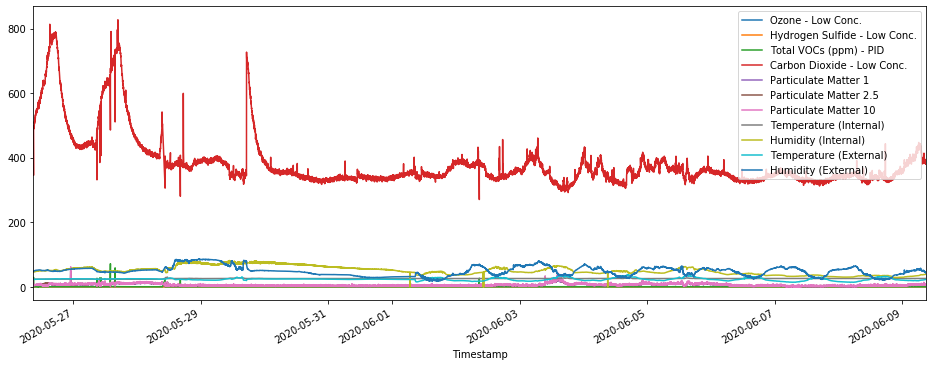

In [29]:
# Plot each feature vs time
fig, ax = plt.subplots(figsize=(16, 6))
for col in data.columns:
    data[col] = data[col].astype('float64')    
    data.plot(y=col, use_index=True, ax=ax)
plt.show()

In [30]:
# scaler = StandardScaler()
# scaler = RobustScaler()
scaler = MinMaxScaler()
data_norm = data.copy()
data_norm[:] = scaler.fit_transform(data_norm)

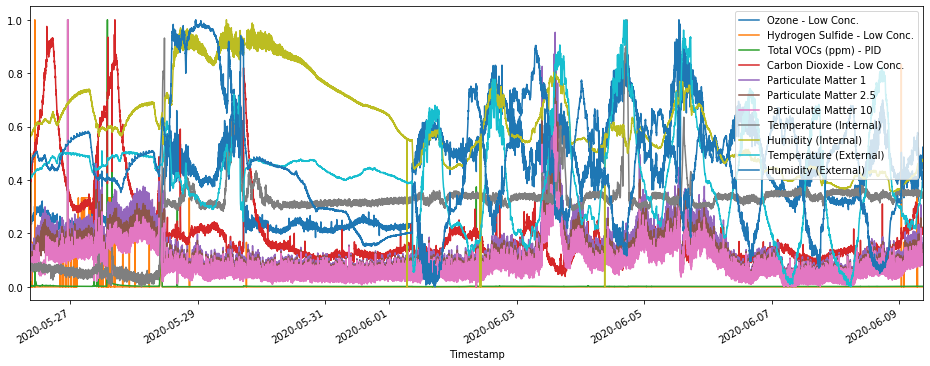

In [31]:
# Plot each feature (normalized) vs time
fig, ax = plt.subplots(figsize=(16, 6))
for col in data_norm.columns:
    data_norm[col] = data_norm[col].astype('float64')    
    data_norm.plot(y=col, use_index=True, ax=ax)
plt.show()

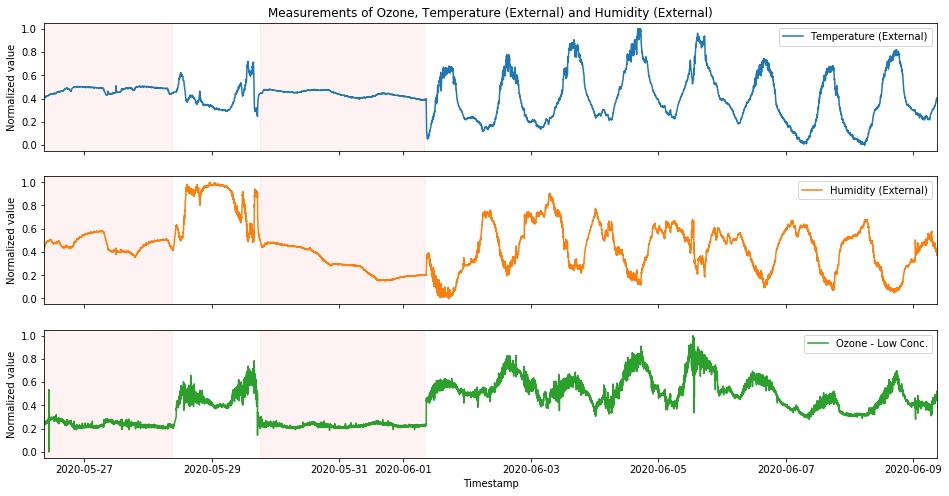

In [84]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(16, 8))
cols = [9, 10, 0]
colors = ['tab:blue', 'tab:orange', 'tab:green']
for i in range(3):
    ax = axs[i]
    col = data_norm.columns[cols[i]]
    ax.plot(data_norm.index, data_norm[col], color=colors[i], label=col)
    ax.set_ylabel('Normalized value')
    ax.set_xlim([data_norm.index[0], data_norm.index[-1]])
    ax.legend()
    ax.axvspan('2020-05-26 09:00:00-04:00', '2020-05-28 9:00:00-04:00', alpha=0.05, color='red')
    ax.axvspan('2020-05-29 18:00:00-04:00', '2020-06-01 8:00:00-04:00', alpha=0.05, color='red')
axs[0].set_title('Measurements of Ozone, Temperature (External) and Humidity (External)')
plt.xlabel('Timestamp')
plt.show()

### Time Series of Single Plots

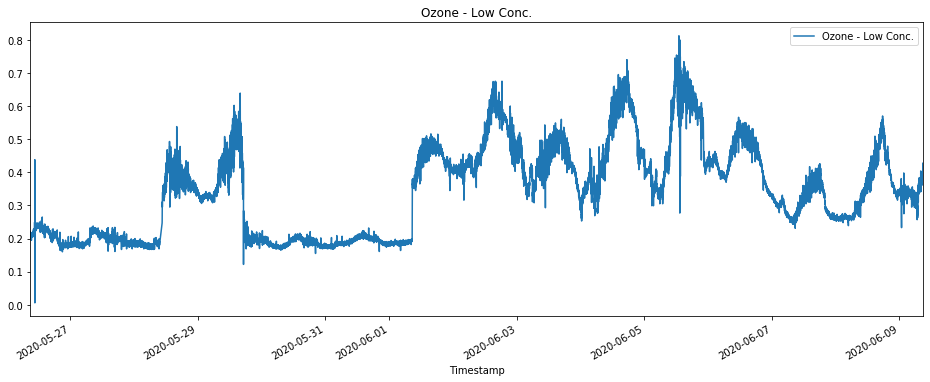

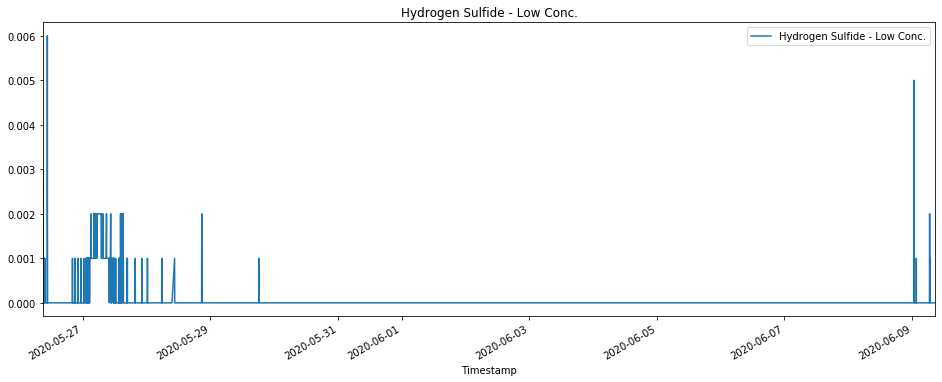

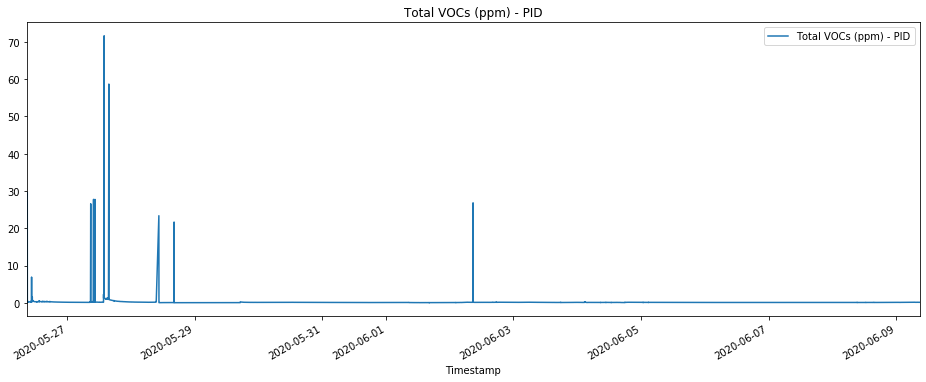

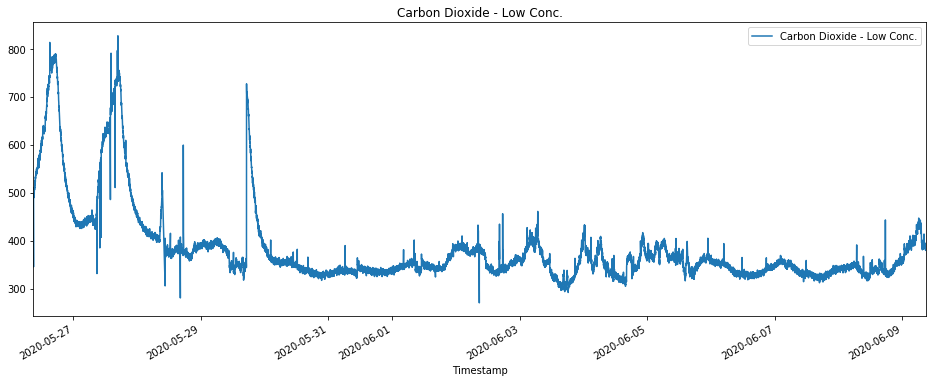

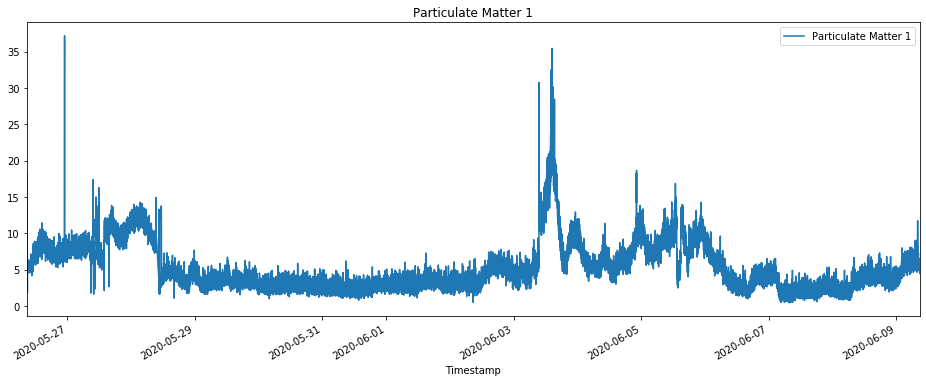

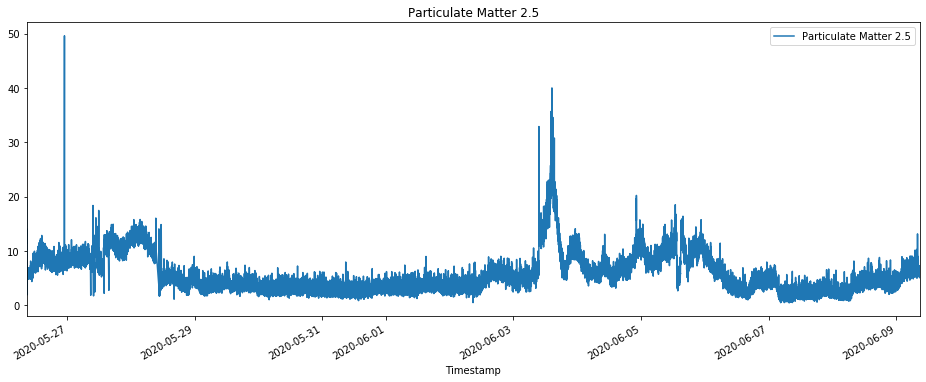

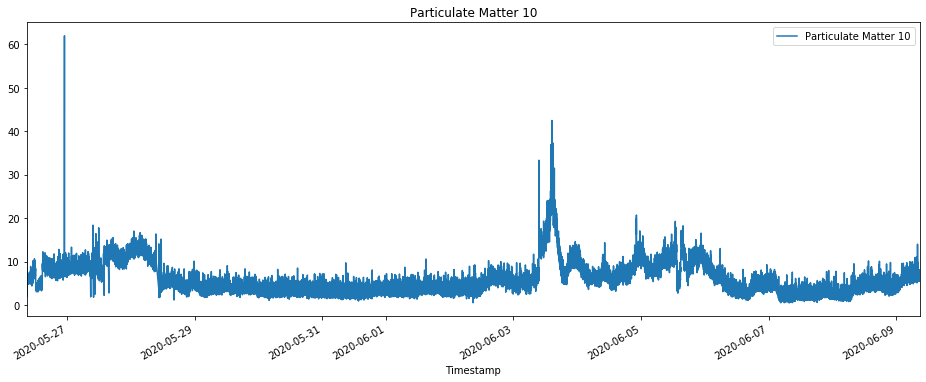

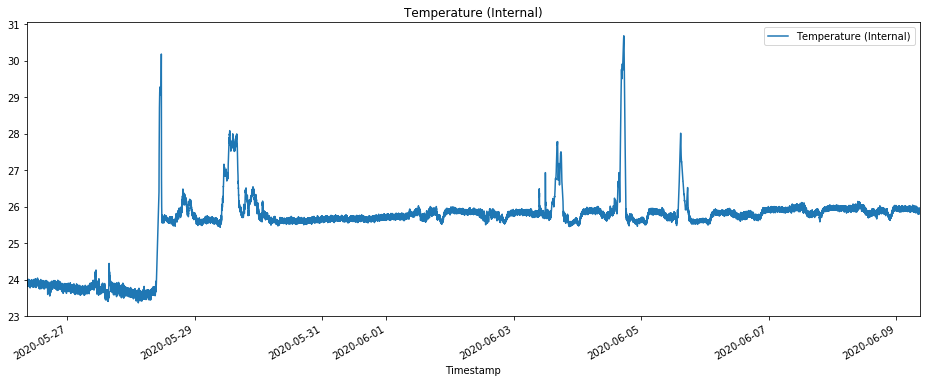

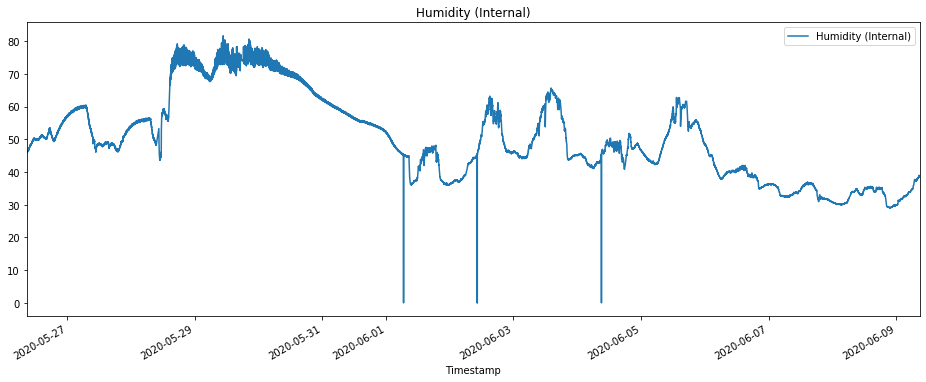

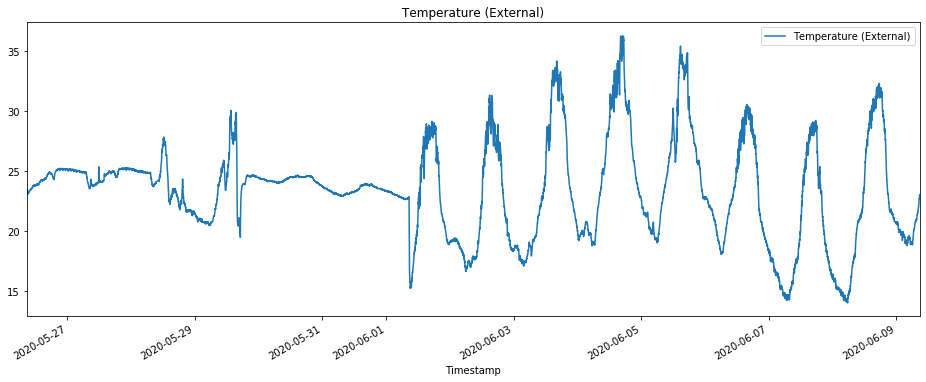

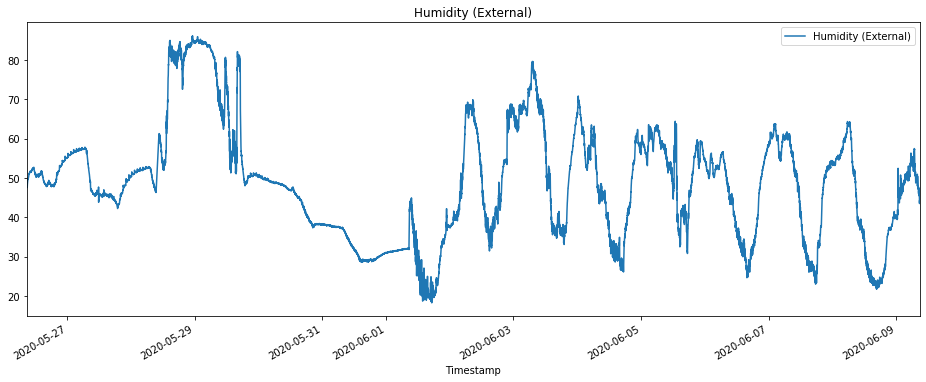

In [60]:
for col in data.columns:
    fig, ax = plt.subplots(figsize=(16, 6))
    data.plot(y=col, use_index=True, ax=ax)
    ax.set_title(col)
plt.show()

### Correlation Plot

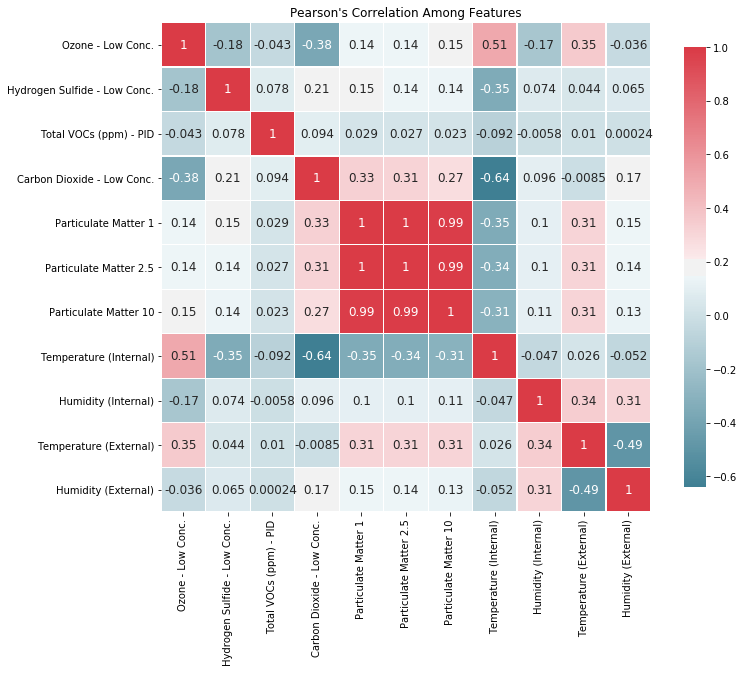

In [83]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(
        data.corr(), 
        cmap = sns.diverging_palette(220, 10, as_cmap = True),
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
plt.title("Pearson's Correlation Among Features")
plt.show()

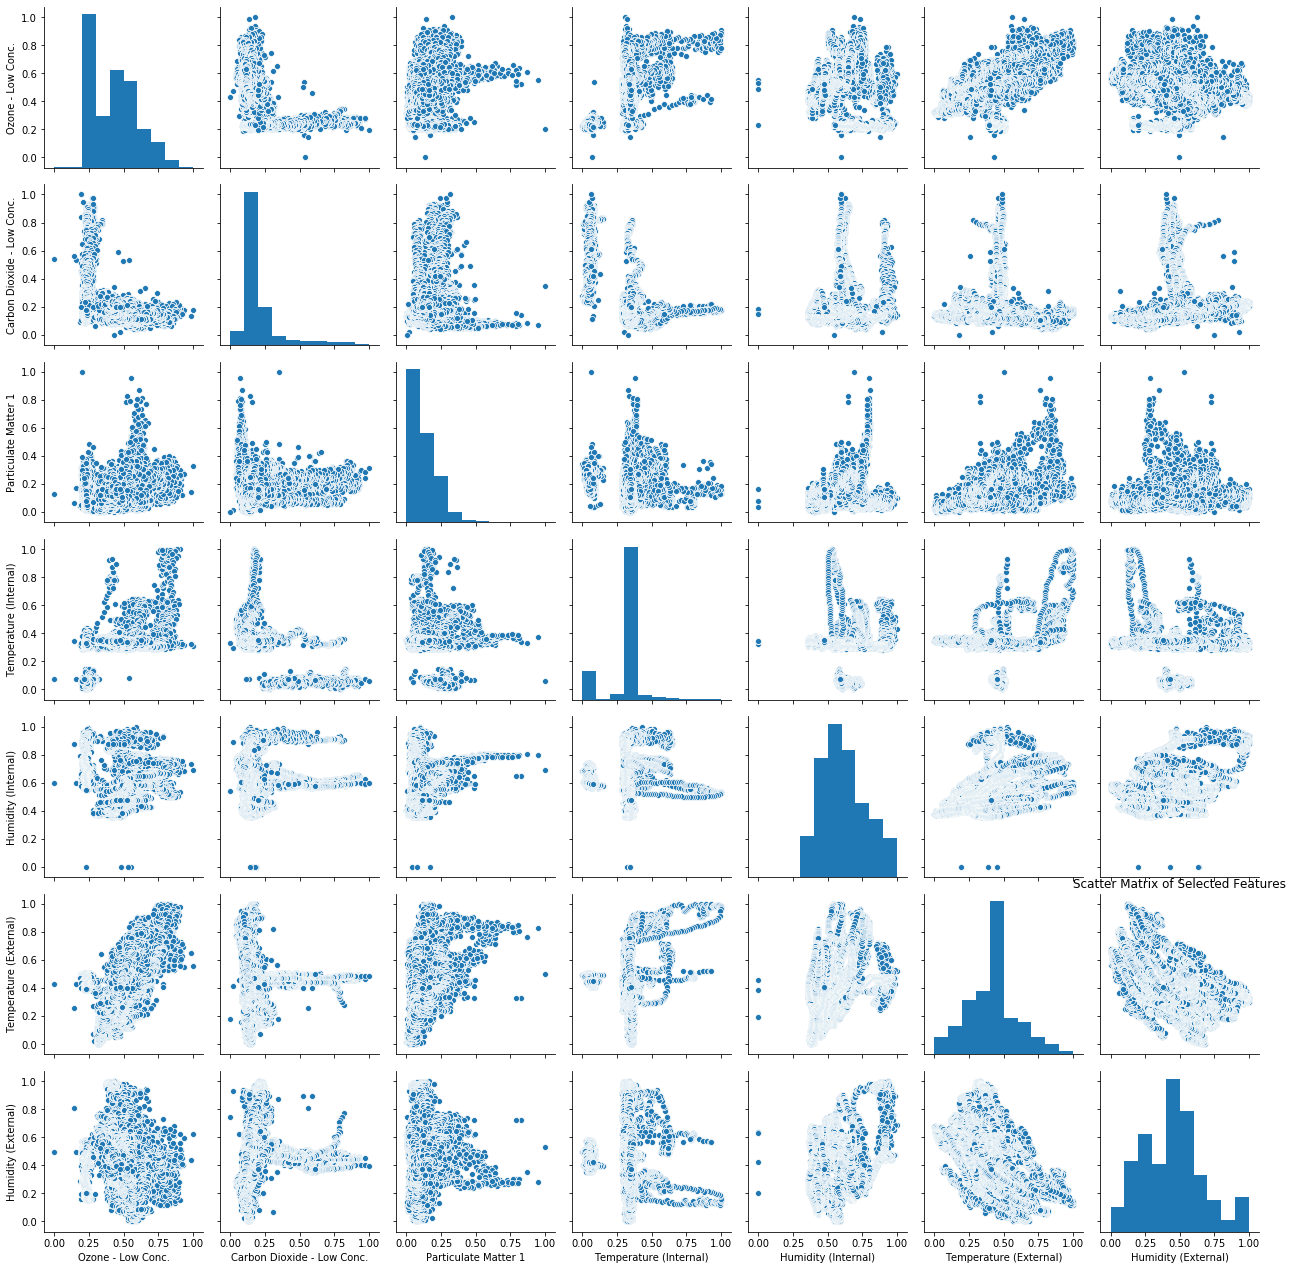

In [86]:
df = data_norm.iloc[:, [0, 3, 4, 7, 8, 9, 10]]
sns.pairplot(df)
plt.title("Scatter Matrix of Selected Features")
plt.show()

### Compare Toronto weather data with measurement

In [62]:
tw = pd.read_csv('../data/weatherstats_toronto_hourly.csv')

In [63]:
tw['TimeStamp'] = pd.to_datetime(tw['unixtime'], unit='s')
tw.set_index('TimeStamp', inplace=True)
tw.index = tw.index.tz_localize('UTC').tz_convert('US/Eastern')
tw = tw[(tw.index >= '2020-05-26 09:00:00-04:00') & (tw.index <= '2020-06-09 09:00:00-04:00')]
tw = tw.iloc[::-1]

In [64]:
tw.head()

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation
TimeStamp,,,,,,,,,,,,,,,,,,,
2020-05-26 09:00:00-04:00,2020-05-26 09:00:00 EDT,1590498000,99.91,102.0,SSE,15,5,NaN,71,17.6,23.1,NaN,29.0,24100,3.5,NaN,7.0,NaN,NaN
2020-05-26 10:00:00-04:00,2020-05-26 10:00:00 EDT,1590501600,99.89,101.9,SSE,15,8,NaN,63,18.1,25.5,NaN,32.0,24100,3.5,NaN,3.0,NaN,NaN
2020-05-26 11:00:00-04:00,2020-05-26 11:00:00 EDT,1590505200,99.89,101.9,SE,14,13,NaN,61,17.9,25.9,NaN,32.0,24100,3.3,NaN,1.0,NaN,NaN
2020-05-26 12:00:00-04:00,2020-05-26 12:00:00 EDT,1590508800,99.89,101.9,SE,14,14,NaN,59,18.4,26.9,NaN,33.0,24100,3.3,NaN,1.0,NaN,NaN
2020-05-26 13:00:00-04:00,2020-05-26 13:00:00 EDT,1590512400,99.86,101.9,S,18,15,NaN,57,19.1,28.2,NaN,35.0,24100,3.3,NaN,1.0,NaN,NaN


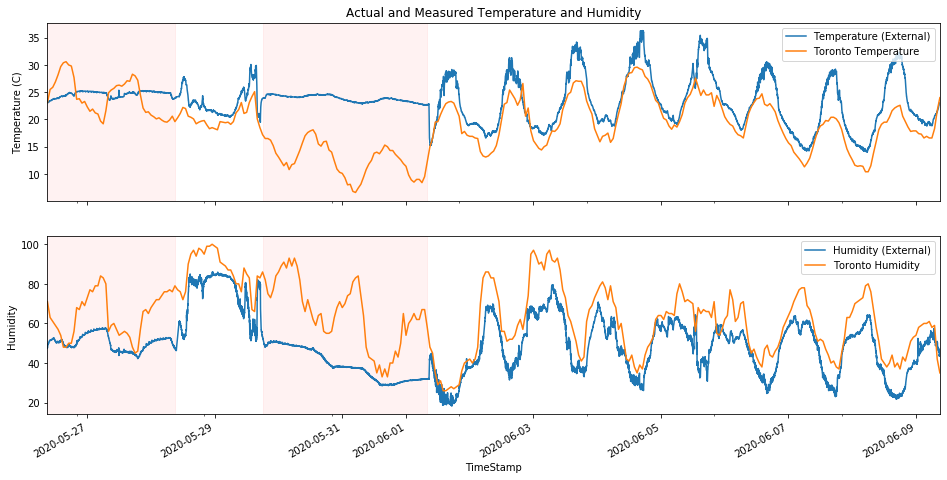

In [80]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 8))
data.plot(y='Temperature (External)', use_index=True, ax=ax1, color='tab:blue')
tw.plot(y='temperature', use_index=True, ax=ax1, color='tab:orange', label='Toronto Temperature')
data.plot(y='Humidity (External)', use_index=True, ax=ax2, color='tab:blue')
tw.plot(y='relative_humidity', use_index=True, ax=ax2, color='tab:orange', label='Toronto Humidity')
ax1.set_ylabel('Temperature (C)')
ax2.set_ylabel('Humidity')
ax1.set_title('Actual and Measured Temperature and Humidity')
for ax in (ax1, ax2):
    ax.axvspan('2020-05-26 09:00:00-04:00', '2020-05-28 9:00:00-04:00', alpha=0.05, color='red')
    ax.axvspan('2020-05-29 18:00:00-04:00', '2020-06-01 8:00:00-04:00', alpha=0.05, color='red')
    ax.legend(loc='upper right')
plt.show()

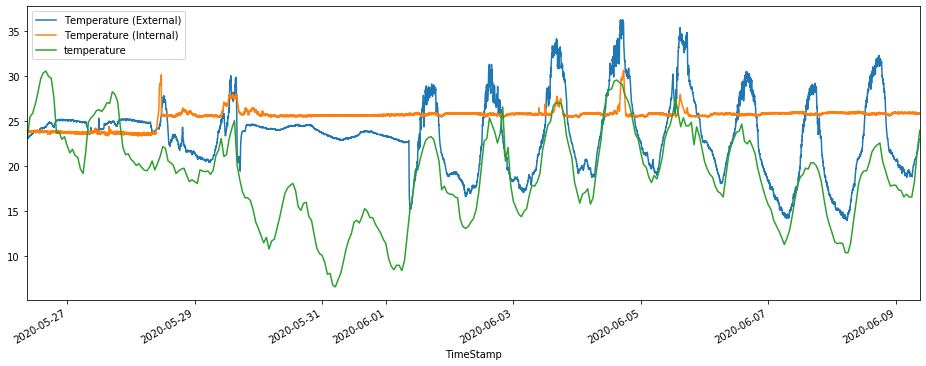

In [18]:
fig, ax = plt.subplots(figsize=(16, 6))
data.plot(y='Temperature (External)', use_index=True, ax=ax)
data.plot(y='Temperature (Internal)', use_index=True, ax=ax)
tw.plot(y='temperature', use_index=True, ax=ax)
plt.show()

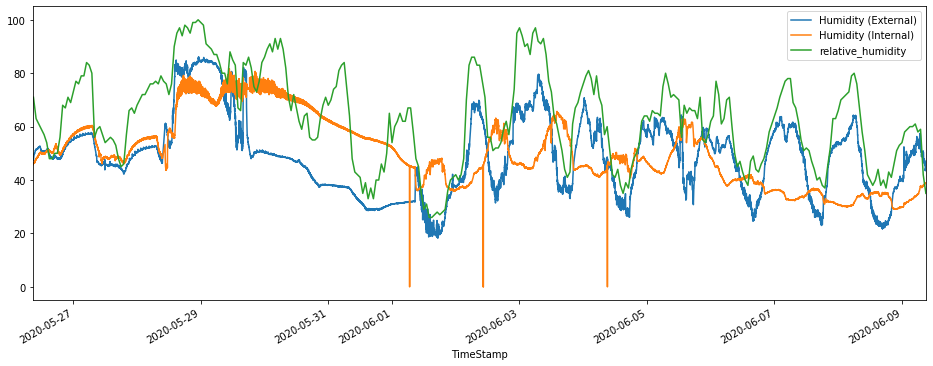

In [19]:
fig, ax = plt.subplots(figsize=(16, 6))
data.plot(y='Humidity (External)', use_index=True, ax=ax)
data.plot(y='Humidity (Internal)', use_index=True, ax=ax)
tw.plot(y='relative_humidity', use_index=True, ax=ax)
plt.show()

## Save preapared data

In [20]:
import pickle

In [23]:
with open('../data/data_full.pkl', 'wb') as f:
    pickle.dump((data, data_norm), f)